# ML for Beginers
# 2-Regression
## 2-Data



### Data loading

In [13]:
# Let's examine the data with Pandas
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.
1756,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/29/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,"MINIATURE LOWER, OTHERS STEADY."


In [4]:
# How many missing datas ?
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [5]:
# Select only the columns we need, with all rows (:) 
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [6]:
# Average price of a pumpkin
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

# Convert date to only show the month
month = pd.DatetimeIndex(pumpkins['Date']).month

In [7]:
print(month)

Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)


### Data selection

In [8]:
# Create a new dataframe with the new columns
new_pumpkins = pd.DataFrame({
    'Month': month, 
    'Package': pumpkins['Package'], 
    'Low Price': pumpkins['Low Price'], 
    'High Price': pumpkins['High Price'], 
    'Price': price})

new_pumpkins.head()


,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


In [9]:
# Filter out stange pachage
pumkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumkins.head()

,Package,Low Price,High Price,Date
70,1 1/9 bushel cartons,15.0,15.0,9/24/16
71,1 1/9 bushel cartons,18.0,18.0,9/24/16
72,1 1/9 bushel cartons,18.0,18.0,10/1/16
73,1 1/9 bushel cartons,17.0,17.0,10/1/16
74,1 1/9 bushel cartons,15.0,15.0,10/8/16


In [10]:
# Correct the price for the strange packages
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [12]:
new_pumpkins.describe()

,Month,Low Price,High Price,Price
count,1757.000000,1757.000000,1757.000000,1757.000000
mean,9.618099,124.571338,132.970939,130.934172
std,1.104646,83.876591,89.524958,83.805846
min,1.000000,0.240000,0.240000,0.240000
25%,9.000000,24.000000,24.500000,35.000000
50%,10.000000,140.000000,150.000000,145.000000
75%,10.000000,180.000000,200.000000,192.500000
max,12.000000,480.000000,480.000000,480.000000


### Data visualisation

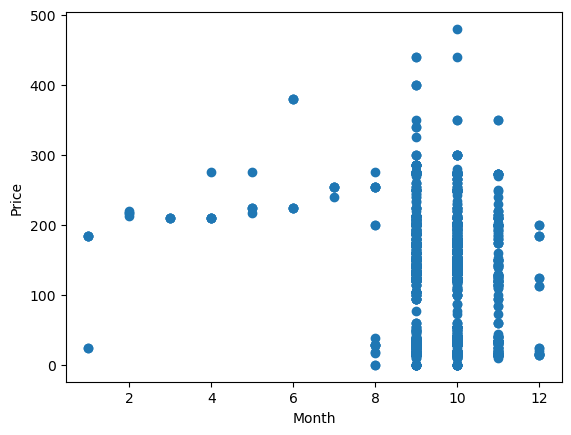

In [18]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(month, price)
plt.xlabel('Month')
plt.ylabel('Price')

plt.show()

Text(0, 0.5, 'Pumpkin Price')

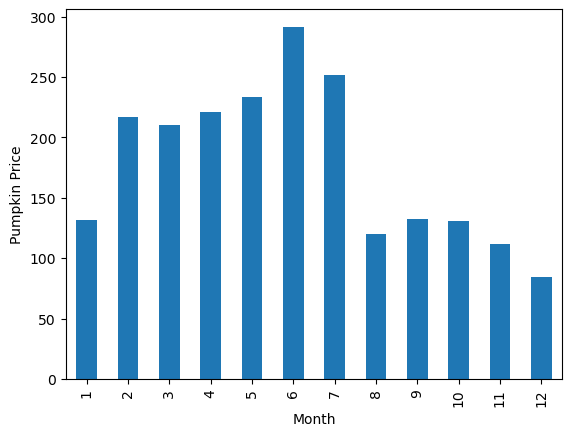

In [19]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')

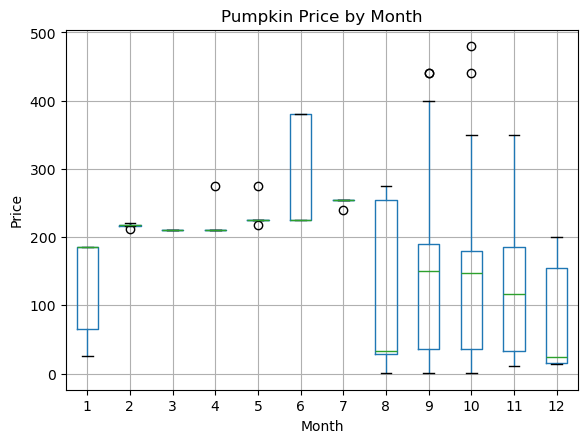

In [20]:
# Try a bette plot
new_pumpkins.boxplot(by='Month', column=['Price'])
plt.ylabel('Price')
plt.suptitle('')
plt.title('Pumpkin Price by Month')
plt.show()